In [1]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName='DM_Project')

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime

#.filter(lambda l: 'Gemeente' not in l)
counterpoint_data = (sc.textFile('../Data mining/Export.csv'))
# station_dict = sc.broadcast(counterpoint_data)
print(counterpoint_data.collect())


['Gemeente;Type fietspad;Oorsprong;Bestemming;Richting;Type dag;Uur;Jaar;Gemiddeld aantal fietsers;Code fietstelpunt', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;0;2015;14;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;1;2015;8;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;2;2015;5;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;3;2015;4;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;4;2015;7;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;5;2015;9;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;werkdag;6;2015;35;MERCA', 'Antwerpen;tweerichtingsfietspad;Antwerpen (Berchem);Antwerpen (Centraal);Hoofdrichting;

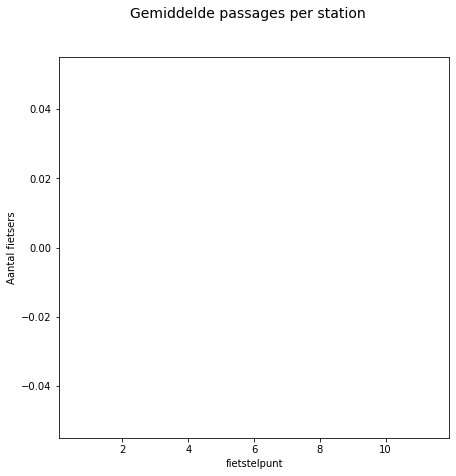

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = [i+1 for i in range(11)]
y_axis = []

for i in range(11):
    try:
        y_axis.append(counterpoint_data[i][8]['Gemiddeld aantal fietsers'])
    except:
        y_axis.append(0)

fig1 = plt.figure(figsize=(7, 7))
fig1.suptitle('Gemiddelde passages per station', fontsize=14)
ax = fig1.add_subplot(111)
ax.set_xlabel('fietstelpunt')
ax.set_ylabel('Aantal fietsers')
ax.bar(x_axis, y_axis, fc='red', align='center')
plt.show()
